In [1]:
import torch
import torch.nn as nn
import torchvision.models.resnet as resnet
import artlearn.common_utils as common_utils

In [2]:
net = resnet.resnet18()

In [3]:
train, test, val = common_utils.get_dataloaders()

In [4]:
torch.cuda.is_available()


True

In [5]:
import torch.optim as optim
import matplotlib.pyplot as plt

#make sure we do things on the gpu
net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

val_acc = []
iterations = []
train_len = len(train)

for epoch in range(80):
    
    running_loss = 0
    
    for i, sample in enumerate(train):
        images, labels = sample['images'].cuda(), sample['labels'].cuda()
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 80 == 79:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 80))
            running_loss = 0.0
            with torch.no_grad():
                total = 0
                correct = 0
                for sample in val:
                    images,labels = sample['images'].cuda(), sample['labels'].cuda()
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                val_acc.append(100*correct/total)
                iterations.append((i+1) + (train_len * epoch))
                print("[%d, %5d] test accuracy: %.3f" % (epoch + 1, i + 1, 100*correct/total))
                    
print('done')


[1,    80] loss: 3.624
[1,    80] test accuracy: 12.786
[1,   160] loss: 3.273
[1,   160] test accuracy: 13.000
[2,    80] loss: 3.186
[2,    80] test accuracy: 15.500
[2,   160] loss: 3.083
[2,   160] test accuracy: 18.429
[3,    80] loss: 3.077
[3,    80] test accuracy: 16.286
[3,   160] loss: 3.016
[3,   160] test accuracy: 17.786
[4,    80] loss: 2.953
[4,    80] test accuracy: 21.214
[4,   160] loss: 2.901
[4,   160] test accuracy: 23.000
[5,    80] loss: 2.875
[5,    80] test accuracy: 22.071
[5,   160] loss: 2.801
[5,   160] test accuracy: 23.357
[6,    80] loss: 2.788
[6,    80] test accuracy: 25.286
[6,   160] loss: 2.764
[6,   160] test accuracy: 23.929
[7,    80] loss: 2.690
[7,    80] test accuracy: 26.357
[7,   160] loss: 2.673
[7,   160] test accuracy: 26.714
[8,    80] loss: 2.644
[8,    80] test accuracy: 29.714
[8,   160] loss: 2.611
[8,   160] test accuracy: 28.214
[9,    80] loss: 2.599
[9,    80] test accuracy: 27.000
[9,   160] loss: 2.572
[9,   160] test accuracy:

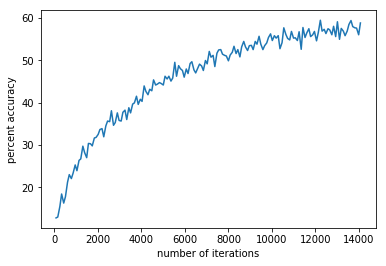

In [6]:
plt.plot(iterations, val_acc)
plt.xlabel('number of iterations')
plt.ylabel('percent accuracy')
plt.show()

In [8]:
torch.save(net.state_dict(), 'pytorch_resnet_model_80e')

In [9]:
torch.cuda.empty_cache()

Now what happens when we use Resnet with pretrained weights from ImageNet?